In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [321]:
df = pd.read_csv('fourCollections.csv', dtype={'collection_slug': 'str', 'asset_id': 'int', 'asset_name': 'str', 'owner_username': 'str', 'owner_address': 'str', 'event_type': 'str'})
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('collection_slug', axis=1,inplace=True)
df.drop('asset_contract_date', axis=1, inplace=True)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
#.dt.strftime('%m/%d/%Y')

In [322]:
df.set_index(df['event_timestamp'], inplace=True)

In [323]:
#df = df[df['event_type'] == 'successful']

az_df = df[df['collection_name'] == 'Azuki']
ba_df = df[df['collection_name'] == 'Bored Ape Yacht Club']
mf_df = df[df['collection_name'] == 'mfers']
cc_df = df[df['collection_name'] == 'Crypto Coven']


In [324]:
def graph(i_df, i):
    i_df = i_df.resample('D').apply({'asset_id':'count'})
    fig = plt.figure(figsize=(12, 8))
    plt.plot(i_df)

    plt.title(f'Frequency by Days for {i} collection')
    plt.xlabel('Date')
    plt.ylabel('Frequency')

    plt.legend({i})
    plt.tight_layout()
    plt.show()

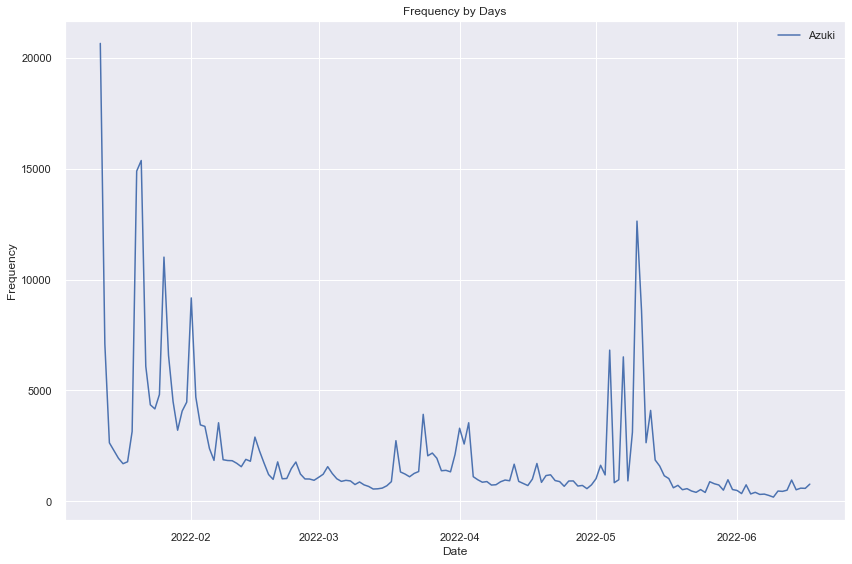

In [325]:
graph(az_df, 'Azuki')

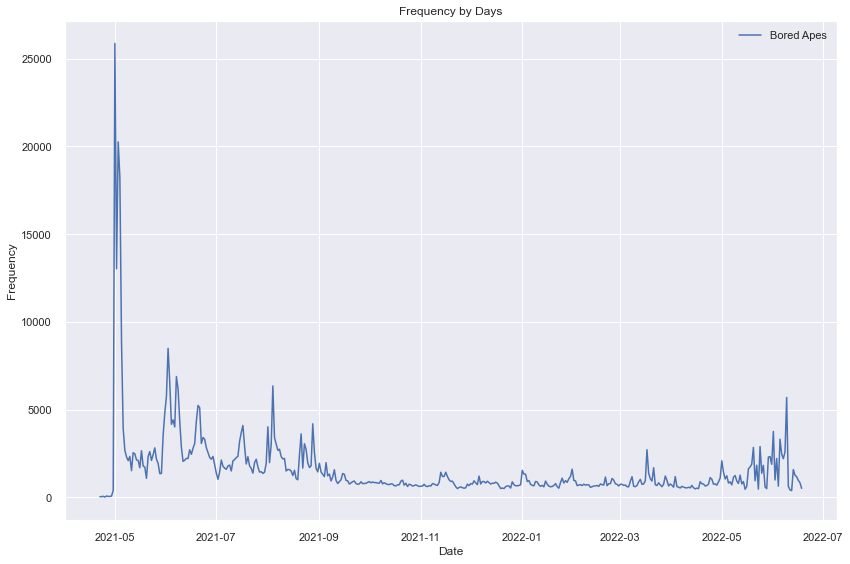

In [326]:
graph(ba_df, 'Bored Apes')

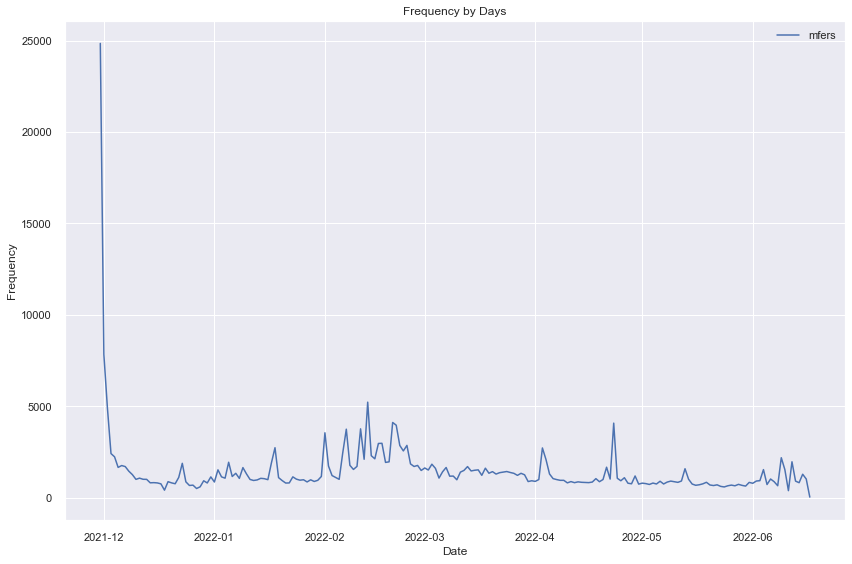

In [327]:
graph(mf_df, 'mfers')

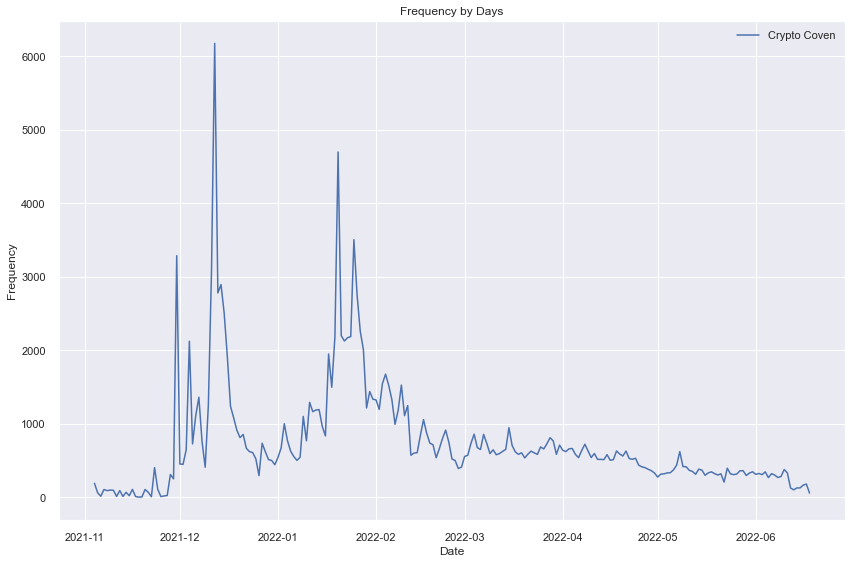

In [328]:
graph(cc_df, 'Crypto Coven')